# Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [2]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot

## Analytic methods

If we know the parameters of the sampling distribution, we can compute confidence intervals and p-values analytically, which is computationally faster than resampling.

## Exercises

**Exercise:**    In Section 5.4, we saw that the distribution of adult weights is approximately lognormal. One possible explanation is that the weight a person gains each year is proportional to their current weight. In that case, adult weight is the product of a large number of multiplicative factors:

w = w0 f1 f2 ... fn  

where w is adult weight, w0 is birth weight, and fi is the weight gain factor for year i.

The log of a product is the sum of the logs of the factors:

logw = logw0 + logf1 + logf2 + ... + logfn 

So by the Central Limit Theorem, the distribution of logw is approximately normal for large n, which implies that the distribution of w is lognormal.

To model this phenomenon, choose a distribution for f that seems reasonable, then generate a sample of adult weights by choosing a random value from the distribution of birth weights, choosing a sequence of factors from the distribution of f, and computing the product. What value of n is needed to converge to a lognormal distribution?

In [3]:
# Solution goes here
import first

live, firsts, others = first.MakeFrames()

In [6]:
# This function prints out the various values from a numpy array
def print_info(a):
    print('number of elements:', a.size)
    print('number of dimensions:', a.ndim)
    print('shape:', a.shape)
    print('data type:', a.dtype)
    print('strides:', a.strides)
    print('flags:')
    print(a.flags)


In [7]:
# array of the totalwgt at birth from the live dataframe

x = np.array(live.totalwgt_lb)
print_info(x)

number of elements: 9148
number of dimensions: 1
shape: (9148,)
data type: float64
strides: (8,)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [8]:
# In order to work with the numpy array we need to drop the NaN values
x1 = np.array(live.totalwgt_lb.dropna())
print_info(x1)

number of elements: 9038
number of dimensions: 1
shape: (9038,)
data type: float64
strides: (8,)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [9]:
y = np.log10(x1.max())
print('log of the max weight :', y)
print('maximum birth weight :',x1.max())

log of the max weight : 1.188576970603741
maximum birth weight : 15.4375


In [80]:
y = np.random.choice(100,(2,2))
y

array([[27, 18],
       [99, 17]])

In [81]:
x = np.random.normal(1,1.5,3)
x

array([2.53851068, 2.26442975, 2.61475659])

In [82]:
z = np.prod(x)
z

15.030350668948767

In [83]:
z1 = x[0] * x[1] * x[2]
z1

15.030350668948767

In [84]:
def GenerateAdultWeight(birth_weights, n):
    """Generate a random adult weight by simulating annual gain.

    birth_weights: sequence of birth weights in lbs
    n: number of years to simulate

    returns: adult weight in lbs
    """
    bw = random.choice(birth_weights)
    factors = np.random.normal(1.09, 0.03, n)
    aw = bw * np.prod(factors)
    return aw

In [85]:
def PlotAdultWeights(live):
    """Makes a normal probability plot of log10 adult weight.

    live: DataFrame of live births

    
    """
    birth_weights = live.totalwgt_lb.dropna().values
    aws = [GenerateAdultWeight(birth_weights, 40) for _ in range(1000)]
    log_aws = np.log10(aws)
    thinkstats2.NormalProbabilityPlot(log_aws)
    thinkplot.Config(xlabel='standard normal values',
                     ylabel='adult weight (log10 lbs)',
                     loc='lower right')

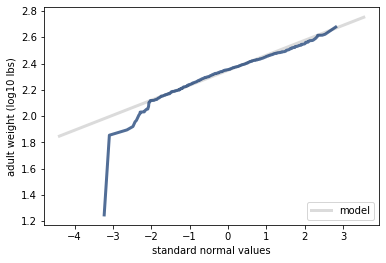

In [86]:
PlotAdultWeights(live)

### With n=40 the distribution is approximately lognormal except for the lowest weights.
### Actual distribution might deviate from lognormal because it is a mixture of people at different ages, or because annual weight gains are correlated.